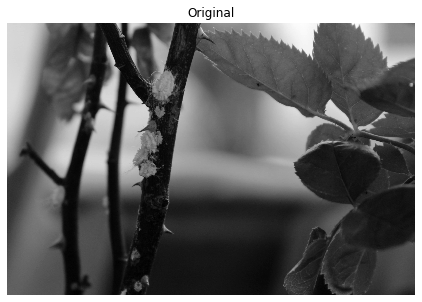

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

img = imread('mealybugs.jpg')
img = np.mean(img, -1)

plt.figure(figsize=(8, 5))
plt.axis('off')
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.show()

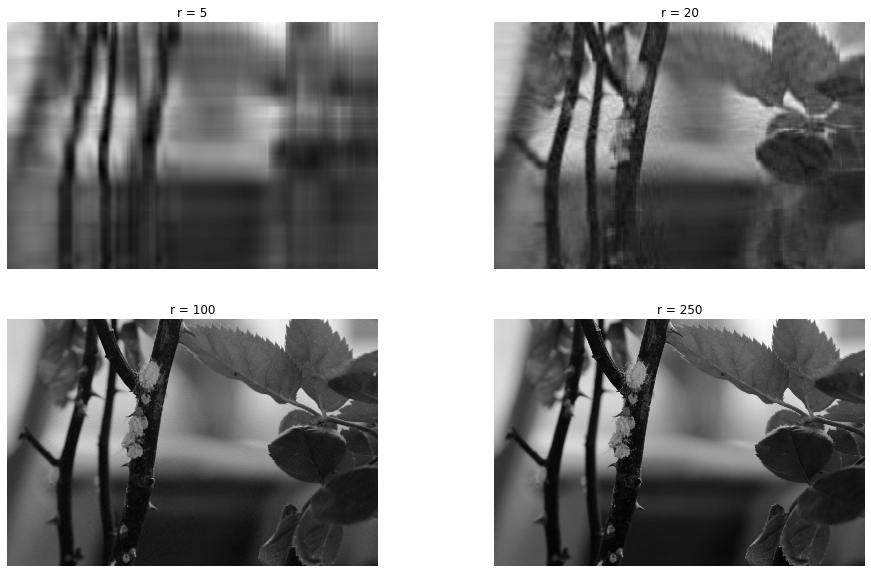

In [2]:
## Compute SVD
U, S, VT = np.linalg.svd(img, full_matrices=False)
S = np.diag(S)

plt.figure(figsize=(16,10))

j = 1
for r in (5, 20, 100, 250):
    # Construct approximate image
    img_approx = U[:,:r] @ S[:r,:r] @ VT[:r,:]
    plt.subplot('22'+str(j))
    j += 1
    plt.title('r = '+str(r))
    plt.axis('off')
    plt.imshow(img_approx, cmap='gray')

plt.show()

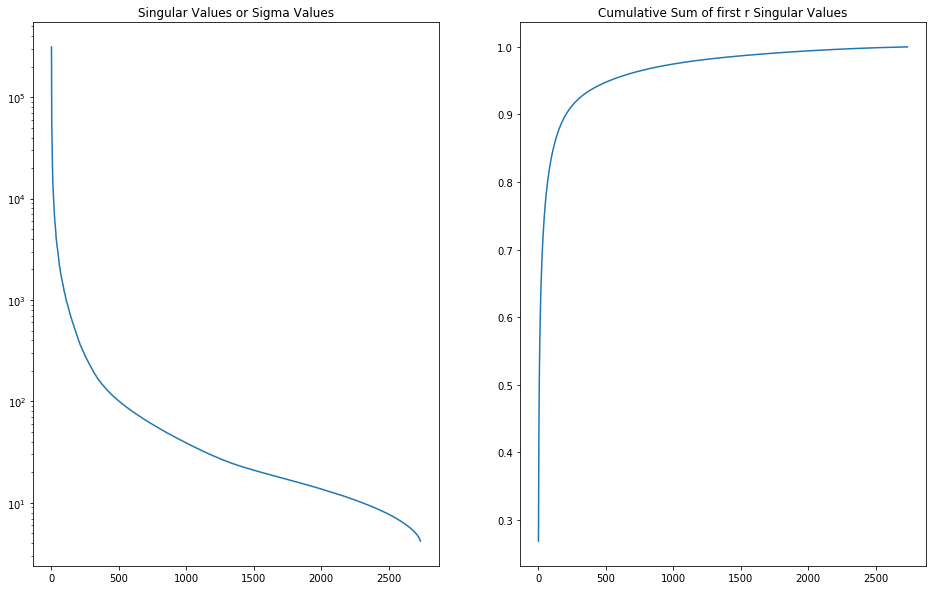

In [3]:
# Plot Sigma and Cumulative energy in first 'r' columns/rows

plt.figure(figsize=(16,10))
plt.subplot('121')
plt.title('Singular Values or Sigma Values')
plt.semilogy(np.diag(S))

plt.subplot('122')
plt.title('Cumulative Sum of first r Singular Values')
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))

plt.show()